### Introduction

Images in computer are represented using matrices. Images are nothing but a two dimensional set of numbers, each holding a particular value. In case of black and white image, the value ranges from 0 to 255, with 0 indicating black (no color) and 255 indicating white (all colors). In colored pictures, there are three values per pixel, denoted as RGB (red, green and blue). It has been shown that a combination of red, green and blue can create all the colors in the spectrum. A huge array of such numbers can create a computer image.

One of the ways of achieving image compression is by changing the way the pixel matrix is represented. If we can somehow accommodate the entire matrix in a shorter set of numbers, we can reduce the data and therefore compress the image.

SVD is one such technique of matrix representation. SVD refers to Singular Value Decomposition of a matrix.

### Singular Value Decomposition

Singular Value Decompositions or SVD is the decomposition of any real matrix A (m × n), where (n ≤ m) as follows:

$A = U D V^{T}$  where:
- U is an (m × m) orthogonal matrix containing the Eigenvectors of the symmetric matrix A A<sup>T</sup>. The product U<sup>T</sup> U = I
- D is a (m × n) diagonal matrix, containing the singular values of matrix A arranged in the diagonal in **descending** order. So basically it can be said that D = SI where S is a vertical matrix containing the singular elements and I is identity matrix. The number of non zero diagonal elements of D corresponds to the rank r of A.
- V<sup>T</sup> is an (n × n) orthogonal matrix, containing the Eigenvectors of the symmetric matrix A<sup>T</sup> A. The product V<sup>T</sup> V = I.

**Singular Values** are the square roots of the Eigen values of the corresponding square gram matrix of a given matrix.

Steps to find out singular values:
1.	Let A be a square or non-square matrix. Compute A<sup>T</sup>A.
2.	A<sup>T</sup>A is always square. Find out Eigen values λ of A<sup>T</sup>A.
3.	The singular values are the square root of the non-zero Eigen values of A<sup>T</sup>A.

Let us consider an example:

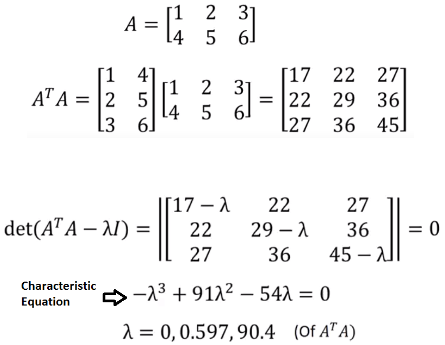

The square roots of 0.597 and 90.4 will give us the required Singular Values.

Let us see an example of the decomposition:

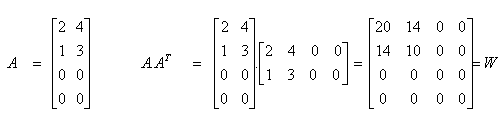

Now that we obtained a square matrix W from the given matrix A, we need to determine the Eigen values of the matrix W.

Since (W- λI) X = 0, then W X = λ X

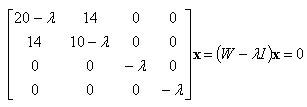

Doing |W- λI| = 0, we obtain:

λ = 0, λ = 0, λ = 29.883, λ = 0.117

Singular values: sq. root of 29.883 = 5.46 and sq. root of 0.117 = 0.342

Now, we know, X = (a b c d)<sup>T</sup>, where a, b, c, d are variables. So the equations:

19.883a + 14b = 0

14a + 9.883b = 0

c = 0

d = 0

(Putting λ = 29.883)

From first two equations, we get: 19.883a + 14b = 14a + 9.883b

Solving: 5.883a = -4.117b

Taking ratio: -1.43a =b

-9.883a + 14b = 0

14a - 19.883b = 0

c = 0

d = 0

(Putting λ = 0.117)

From first two equations, we get: -9.883a + 14b = 14a - 19.883b

Solving: 25.883a = 35.883b

Taking ratio: a = 1.38b

SVD representation of a matrix in the order G = UDV<sup>T</sup>:

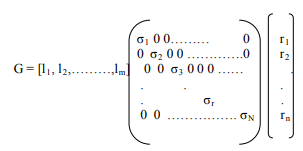

σ denotes singular values where σ1 > σ2 > σ3 > σ4 > … > σN.

SVD Use Case – Image Compression: An image can be compressed using SVD as follows:
1.	An image of size m × n pixels can be represented by a m × n matrix say A. Using SVD, A can be represented as A = UDV<sup>T</sup>
2.	To reduce the matrix using SVD, recall that D contains the singular values of A arranged in descending order along its diagonal. *Because of them being descendingly arranged, the first few largest singular values consist of maximum information and the amount of information declines as you go down the diagonal. These lower order singular values can be discarded without causing image distortion.* The elimination of these unnecessary values can reduce the size.

Assuming only k singular values are retained, and writing A = UDV<sup>T</sup>
A = Σu<sub>I</sub>d<sub>I</sub>v<sub>I</sub><sup>T</sup> , where I iterates till k and k < r, r is the rank of image matrix A.
The storage space required to store the m × n matrix of rank r is therefore reduced.

**Requirements:**

This program shall be done in python. It will require Matplotlib library, NumPy library, SciPy library and Scikit Image library.
An image (black and white) which is to be compressed is also required.

In [3]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

The Skimage library is an image processing library which can be used to open, save and manipulate images in Python. Matplotlib will be used to plot the image pixels in the graph.

The io of skimage will be used to import an image from an external input-output device into python and represent it in matrix form. The pyplot of matplotlib will be used to plot the image in the graph.

Numpy module will be required to operate on the matrices and evaluating the singular value decomposition matrices.

Numpy’s sub-module for linear algebra is called numpy.linalg. It will also be used in evaluating singular value decompositions later on.

In [4]:
image3d = io.imread("/home/apratim/Codes/Python/folder/image.jpg")

The io.imread function takes in a location with a file name and returns the starting address of the 3D image matrix to a variable. Here, the variable is image3d.

The ‘variable’ image3d is actually a Numpy variable. *The basic variable of Numpy is a n-dimensional array, also called ndarray.* This is the specialty of io.imread() function, it automatically reads the image and creates a Numpy (array) variable instead of a regular Python array to store the matrix in it, so that image processing can be done easily.

**Q. Why are we using C:\\Users\\user… instead of C:\Users\user?**

**A.** The single slash sign will show Unicode error as they start an eight-character Unicode instruction in Python. Using single slash in Python comments will also generate error. So replace single slash by double slash (\\) every time.

In [5]:
print(type(image3d), image3d.dtype, image3d.shape)

<class 'numpy.ndarray'> uint8 (354, 620, 3)


image3d is now storing the starting of the pixel matrix of the specified image in the earlier line. 

**type:** The type of object. Here, it is a numpy array so the resultant output will be so.

**dtype:** The datatype of the homogeneous array. All elements of the array should be the same.

Now, since we chose a black and white image, all the shades can be represented on a scale of 0 to 255, where 0 is black or no color, and 255 is white. The shade of grey can be anywhere from 1 to 254. This type of representation is also called a grayscale. Now, the numbers 0 to 255 can be represented using 8 binary bits, from 00000000 to 11111111. So the datatype in this case will be uint8 (or unsigned integer of 8 bits. int8 denotes signed integers from -125 to 124).

**shape:** Shape denotes the dimensions of the array. Here the shape is the dimension of the image chosen. The dimension can be 1D, 2D, 3D or anything above it.

Now, all images that are imported to Python will be originally represented in 3D matrix. Each ‘slice’ of the matrix will represent shades of red (R), green (G) and blue (B) as shown:

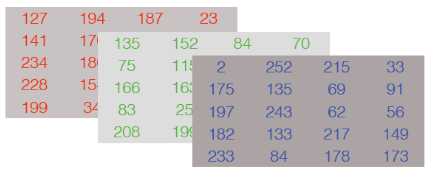

Now, our image is black and white. So there is no need of a 3D matrix; since corresponding element values will be the same, that is, if there is white, R = 255, B = 255, G = 255. In case of black, R = B = G = 0. For any other shade of gray, 0 < R = B = G < 254. So we can safely eliminate two other matrices and operate only on first one; which we will do later.

Our output, in case of **image3d.shape**, assuming we have chosen a 185×165 picture, will be (185, 165, 3) as there are 185 rows, 165 columns and 3 such row-column systems (for R, B, G) in the matrix.

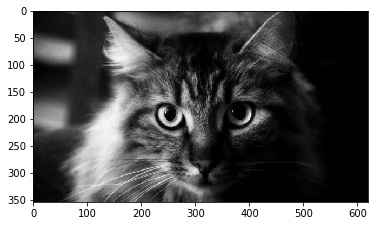

In [6]:
plt.imshow(image3d, cmap = 'gray', interpolation = 'nearest')
plt.show()

These operations will map the image into the X-Y coordinate system. The variable name is image3d, which is the first argument of the function **plt.imshow()**.

Cmap: ?

Interpolation: ?

In [7]:
print(image3d)

[[[30 30 30]
  [30 30 30]
  [29 29 29]
  ...
  [29 29 29]
  [29 29 29]
  [29 29 29]]

 [[29 29 29]
  [ 5  5  5]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[29 29 29]
  [ 5  5  5]
  [ 3  3  3]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[27 27 27]
  [ 3  3  3]
  [ 3  3  3]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[27 27 27]
  [ 3  3  3]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[27 27 27]
  [ 4  4  4]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


This will print the entire pixel matrix with numbers ranging from 0 to 255 as can be seen.

The array starts with three brackets [[[...]]], so it indicates that the array is a three dimensional array. We need to convert it to a two dimensional one. Note that R = B = G always; either they all are [0 0 0] or they all are [255 255 255]. This is only possible in case of a black and white image. For a colored image it will have different values.

In [8]:
image = image3d[:,:,0]
print("Now the 2D slicing of the above matrix will give:")
print(image)

Now the 2D slicing of the above matrix will give:
[[30 30 29 ... 29 29 29]
 [29  5  2 ...  0  0  0]
 [29  5  3 ...  0  0  0]
 ...
 [27  3  3 ...  0  0  0]
 [27  3  2 ...  0  0  0]
 [27  4  2 ...  0  0  0]]


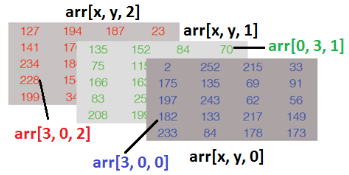

The above image shows the representation of a 3D matrix in Python. Writing **image3d[:, :, 0]** is equivalent to leaving the first two coordinates blank (can be filled up as wished) and only the third coordinate is 0, i.e. **image3d[x, y, 0]**. This is called **slicing an array**.

What we did here is, sliced off the 3D array into three 2D arrays and then took one for future use and discarded the others. So now our required 2D array has been formed and stored in the Numpy array ‘image’.

Now when we do print(image) the output will be as shown. The two brackets at the beginning and the end indicates that this matrix is a 2D matrix. Notice carefully how the 3D matrix generated the 2D by studying the elements.

In [9]:
U, s, VT = la.svd(image)
print(U.shape)
print(s.shape)
print(VT.shape)

(354, 354)
(354,)
(620, 620)


Our goal is to do image compression via Singular Value Decomposition of a matrix. The **numpy.linalg** library allows us to calculate the SVD directly with the numpy.linalg.svd function, as shown. The values returned will be in the order U, S and VT (Check the theory to know what they are). When returned with only one value (like x = la.svd(image)) it will return only the vector of singular values.

Now as it can be seen from the theory at the beginning, “U is an (m × m) orthogonal matrix containing the Eigenvectors of the symmetric matrix AA<sup>T</sup>. D is a (m × n) diagonal matrix, containing the singular values of matrix A arranged in the diagonal in descending order. V<sup>T</sup> is an (n × n) orthogonal matrix, containing the Eigenvectors of the symmetric matrix A<sup>T</sup>A.”

If our chosen image is 185x165, we can therefore expect the dimensions of U, S and V<sup>T</sup> to be as:
```console
(165,165)
(165,)
(185,185)
```

Note: S and D are not the same. S (which is obtained here) is a one dimensional (row only) array containing the singular values of the matrix ‘image’ sorted in descending order. D is a diagonal matrix containing the singular values of the matrix arranged in a diagonal order. So we can say D = S × I. It also denotes that S contains 165 values, i.e. the image matrix has produced 165 singular values.

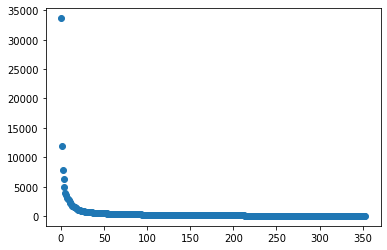

In [10]:
x = np.arange(s.shape[0])
plt.scatter(x, s)

Now, s is the matrix of singular values as discussed above. s.shape is the array of the dimension of s (A matrix 100 × 150 × 3 is represented as (100, 150, 3) which is basically an array. So the shape() function produces an array of a matrix’s dimensions). Again, we know that s.shape = (165,) from the previous output. 

Therefore, s.shape[0] = first element of ‘s.shape’ array = 165.

So now we are doing np.arange(165). This will return an array [0, 1, 2, … 164]. Some other examples of this function:
```console
np.arange(3, 7)  = [3, 4, 5, 6]
np.arange(2, 15, 2) = [2, 4, 6, 8, 10, 12, 14]
```

The scatter function when called with two arguments plots the second argument on the graph and first argument on the X-axis. So we are plotting the singular values on a scale of 0 to 164 via the plt.scatter(x, s) function.

In [11]:
from numpy import diag
from numpy import dot
from numpy import zeros
import scipy.misc

The diag function will take the diagonal elements of a 2D matrix and place those elements linearly in a 1D array.

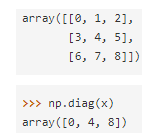

The `dot` function will be used to implement product or multiplication of two matrices. The syntax is matrix3 = matrix1.dot(matrix2).

The `zeros` functions is used to create a square null matrix. zeros(4) will create a 4×4 null matrix with all elements as 0.

The `scipy.misc` will be used to export the compressed image. We can compare the size and measure the degree of compression.

In [12]:
sigma = zeros((image.shape[0], image.shape[1]))

The image.shape matrix, if we recall, for our 185×165 image, was (185, 165). Therefore image.shape[0] = 185 and image.shape[1] = 165. So here we are creating a null matrix of order 185×165 (null matrix meaning all elements are 0), and naming it as sigma.

In [13]:
for it in range(s.shape[0]):
    if it > 50:
        s[it] = 0
print(s)

[33641.84876635 11876.64167486  7807.73104253  6365.86916384
  4878.74431102  3908.91958024  3509.12160113  3076.7607796
  2939.3379467   2681.69723033  2339.09828055  2197.96703395
  2096.27513715  1709.03110507  1653.94331382  1545.8412698
  1498.69578187  1328.72781902  1299.95158689  1197.96934063
  1093.14228883  1028.0223962    952.76017819   887.82282796
   845.5434672    810.13776558   801.08838004   772.41014658
   751.75562059   745.52582581   733.09713307   701.74726386
   691.33547913   676.03174399   638.3674671    616.12491727
   596.80088375   589.43463795   572.33667507   560.1289476
   541.07912643   537.0255319    532.65855427   524.698133
   518.86574929   501.73159158   493.44310768   473.14662369
   462.55084472   458.1188576    451.76476526     0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0. 

Alternate code:
```console
leng = len(s)
leng = leng/4
for it in range(s.shape[0]):
    if it > leng:
    s[it] = 0
print(s)
```

Now here, *we are actually compressing the matrix*. The basic concept is to represent an image with size m×n as a two-dimensional m×n matrix. SVD is then applied to this matrix to obtain the U, S, and V matrices. S is a diagonal m×n matrix whose number of non-zero elements on the diagonal determine the rank of the original matrix. The fundamental concept of the SVD-based image compression scheme is that: To reduce the matrix using SVD, recall that D contains the singular values of A arranged in descending order along its diagonal. Because of them being descendingly arranged, the first few largest singular values consist of maximum information and the amount of information declines as you go down the diagonal. These lower order singular values can be discarded without causing image distortion. Now, ‘s’ is a 1D matrix, whose size is s.shape[0]. So that size is stored in ‘it’, and for all it>50, i.e. all elements having index 50+ are made zero by s[it] = 0.

Again, **if we go for the alternative**, instead of a fixed number (50), we can actually vary the count of non zero elements retained from the singular value matrix based on the number of singular values.
Originally, if there were 100 singular values (for low dimension image), the largest 50 would be retained and the other 50 would be changed to 0, resulting in an acceptable change in quality. However say for a high quality image, there are 2000 singular values. In this case 50 are retained and 1950 are changed to 0, making the image quality significantly worse.

To change that, we can moderate the program into making only one fourth of all singular values to be retained and three fourths to be changed to zero. Thus for 100 singular values we will get only 20 retained and the other 80 values will be changed to zero, and for 2000 values we will have 500 retained and 1500 changed to 0. The quality of compressed image will increase significantly. 
So the array would kind of look as shown in the output.

If we keep more than 50 values, then the image quality will be better, however the compression ratio will be reduced. Notice here that all values are in descending order that is; 38004 > 8395 > 4511 > 3244 > 3027 > 2674 > 2468 > 2115 …

In [14]:
#print("xxxx")
#print(image.shape)
#print(s.shape)

sigma[:image.shape[0], :image.shape[0]] = diag(s)

The diag() function behaves differently for different arrays. For example, if we write a = [1, 2, 3, 4, 5, 6, 7, 8] and print diag(a), since there can’t be any diagonal of a 1D matrix, our output will be as follows (try doing diag(a)!)

But if an array is 2D, then diag(2D_array) will print the diagonal elements in a 1D array. So say, b = [[1, 2, 3], [4, 5, 6], [7, 8, 9]], then diag(b) will give us: [1, 5, 9].

Here ‘s’ is a 1D array containing the singular values of the matrix, with a dimension (165,). So diag(s) will create a 165×165 array and put the elements of s in the diagonal. This is equivalent of doing S×I, where I is identity matrix of dimension 165×165.

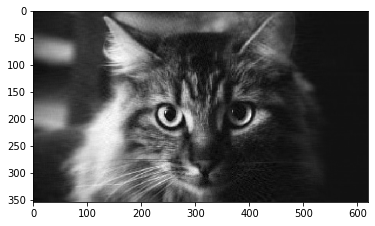

In [15]:
#Reconstruct matrix
B = U.dot(sigma.dot(VT))
plt.imshow(B, cmap = 'gray', interpolation = 'nearest')
plt.show()

Now we are multiplying sigma with VT, and then multiplying the result again with U [Remember that A = UDVT]. The matrix B will give us our resultant compressed image after SVD Decomposition.

In [16]:
#A = np.array([1,2,3,4,5,6,7,8,9])
#A = A.reshape(3, 3)
#iden = np.identity(3)
#iden[2,2] = 0
#print(A)
#print(iden)
#print(A.dot(iden))
#scipy.misc.imsave('a.jpg', image)

In [18]:
import imageio

In [19]:
#scipy.misc.imsave('a.jpg', B) - deprecated
#scipy.misc.imsave('abc.jpg', image) - deprecated
imageio.imwrite('3d_to_2d.jpg', image)
imageio.imwrite('svd_compressed.jpg', B)

Lossy conversion from float64 to uint8. Range [-18.883443690478092, 255.39769465139685]. Convert image to uint8 prior to saving to suppress this warning.


We have changed two things in the picture; made a 3D picture into 2D (which will reduce the size) and compressed it via SVD (which will further reduce the size). Both of these files have been exported to compare the sizes. It can be seen that, sizewise:

Original Image > 3d_to_2d.jpg > svd_compressed.jpg